<a href="https://colab.research.google.com/github/Elwing-Chou/tiba0619/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# pandas型態: 1.DataFrame(2-D) 2. Series(1-D)
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
# 存成別的形式, df.to_csv
df["ans"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


機器學習: 1k~1w

深度學習: 1w~10w

參考問題難度(欄位多寡):

1. 問題簡單: 需要比較少資料

2. 問題困難: 需要比較多資料

In [59]:
# 把資料分成兩部分 一部分叫做訓練資料 一部分叫做驗證資料
import numpy as np
from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4],
#          [5, 6, 7, 8],
#          [9, 10, 11, 12],
#          test_size=0.25)
# !!! 在妳進到機器學習的流程, 不要再是dataframe, 請妳都把她轉成 numpy array
x = df.drop("ans", axis=1)
y = df["ans"]
x = np.array(x)
y = np.array(y)
# [x part1(90%), x part2, y part1, y part2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [60]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
# fit: 訓練
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [47, 43, 45]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 88\nvalue = [0, 43, 45]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.159\nsamples = 46\nvalue = [0, 42, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.046\nsamples = 42\nvalue = [0, 1, 41]\nclass = virginica')]

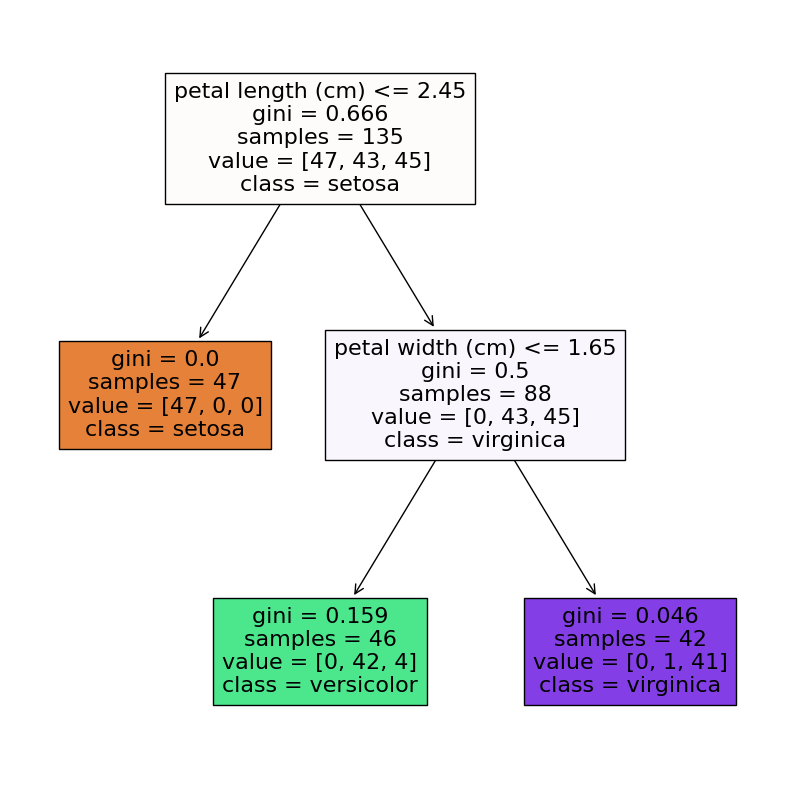

In [61]:
# matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(clf,
     feature_names=iris["feature_names"],
     class_names=iris["target_names"],
     filled=True)

In [62]:
# 對答案: 評分方式是有很多種, 正確率(accuracy)
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.9333333333333333